#  Reading Excel Data Via the Knowledge Network

Python provides plenty of tools for reading and visualising different kinds of tabular data. Here we demonstrate using pandas and xlrd to load and manipulate excel data and the display this data in a matplotlib graph. Using a simple custom widget defined in the 'Filtering Widget.ipynb'.

This notebook was developed by the Oznome Project and is available at https://github.com/oznome/jupyter-examples. The filtering widget was produced in conjunction with the Oznome project as part of the CSIRO EUDM project.

In [81]:
import pandas, xlrd, requests 
from pandas import np
import matplotlib.pyplot as plt
pandas.set_option('display.max_columns', 500)
%matplotlib inline

We request a data record from the CSIRO Knowledge Network 

In [82]:
response = requests.get("http://kn.csiro.au/api/dataset?id=http%3A%2F%2Foznome.csiro.au%2Fid%2Fdata%2Fdata-gov-au%2Fsaimos-biological-and-flow-cytometry-data-collected-from-ctd-stations-in-south-australia-i-20142")
json_data = response.json()

Examining the json respone data we can then figure out how to query this record for futher details

In [83]:
json_data = response.json()
json_data

{'_id': {'_str': '59159ebc3dd97b0a4c16aef0'},
 'author': None,
 'author_email': None,
 'contact_point': 'Paul.vanruth@sa.gov.au',
 'creator_user_id': '4341af66-7d75-4b20-b766-2bb357c39c6b',
 'data_state': 'inactive',
 'extras': [{'key': 'access_constraints', 'value': '[]'},
  {'key': 'bbox-east-long', 'value': '136.90'},
  {'key': 'bbox-north-lat', 'value': '-34.90'},
  {'key': 'bbox-south-lat', 'value': '-35.90'},
  {'key': 'bbox-west-long', 'value': '135.0'},
  {'key': 'contact-email', 'value': 'Paul.vanruth@sa.gov.au'},
  {'key': 'coupled-resource', 'value': '[]'},
  {'key': 'dataset-reference-date',
   'value': '[{"type": "creation", "value": "2015-10-21T10:00:00"}]'},
  {'key': 'dateStamp', 'value': ''},
  {'key': 'frequency-of-update', 'value': 'asNeeded'},
  {'key': 'guid', 'value': '5ae59b78-dc69-4205-80b1-5575adcdf519'},
  {'key': 'licence', 'value': 'other'},
  {'key': 'licence_url', 'value': ''},
  {'key': 'metadata-date', 'value': '2015-10-21T16:36:54'},
  {'key': 'metadata

By using a python list comprehension we can query a particular excel workbook that is referenced in the metadata record

In [84]:
url = [resource for resource in json_data["resources"] if "Picophytoplankton" in resource["name"]][0]["url"]
url

'http://data.aodn.org.au/IMOS/SAIMOS/Flow_Cytometry/2014/07/2014_07_SAIMOS_ANMN_Picophyto_FV02.xls'

Then using requests we can query the specific excel workbook and open it using xlrd

In [85]:
r = requests.get(url)
book = xlrd.open_workbook(file_contents=r.content)

Then list the various sheets contained in this workbook

In [86]:
book.sheet_names()

['RAW',
 'Values for Conversions',
 'Converted_Normalised_QAQC',
 'Converted_CLEAN',
 'emII format']

Using pandas we can read one of these sheets and do some exporatory data analysis starting with listing the available columns

In [87]:
dataframe = pandas.read_excel(url,sheetname='Converted_CLEAN')
dataframe.columns

Index(['Flag', 'Flag comments', 'Station', 'Rep', 'Depth (category)',
       'Depth (m)', 'Prochlorococus', 'Prochloroccus Norm FSC',
       'Prochloroccus NormSSC', 'Prochloroccus  Norm Orange',
       'Prochloroccus  Red', 'Prochlococcus Norm FarRed', 'Synechococcus ',
       'Synechococcus Norm FSC', 'Synechococcus Norm SSC',
       'Synechococcus Norm Orange', 'Synechococcus Norm Chla',
       'Synechococcus Norm FarRed', 'Picoeukaryotes',
       'Picoeukaryotes Norm FSC', 'PicoeukaryotesNorm SSC',
       'Picoeukaryotes Norm Orange', 'Picoeukaryotes Norm Chla',
       'Picoeukaryotes Norm FarRed'],
      dtype='object')

The dataframe describe function tells us more information about these columns

In [88]:
dataframe.describe(include='all')

,Flag,Flag comments,Station,Rep,Depth (category),Depth (m),Prochlorococus,Prochloroccus Norm FSC,Prochloroccus NormSSC,Prochloroccus Norm Orange,Prochloroccus Red,Prochlococcus Norm FarRed,Synechococcus,Synechococcus Norm FSC,Synechococcus Norm SSC,Synechococcus Norm Orange,Synechococcus Norm Chla,Synechococcus Norm FarRed,Picoeukaryotes,Picoeukaryotes Norm FSC,PicoeukaryotesNorm SSC,Picoeukaryotes Norm Orange,Picoeukaryotes Norm Chla,Picoeukaryotes Norm FarRed
count,27.000000,1,27,27.00000,27,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
unique,NaN,1,3,NaN,3,NaN,26.000000,27.000000,25.000000,24.00000,10.000000,22.00000,27.000000,22.000000,18.000000,26.000000,24.00000,26.000000,27.000000,26.000000,26.000000,24.000000,27.000000,25.000000
top,NaN,missing sample,SAM5CB,NaN,Bottom,NaN,3481.481481,0.147575,0.093142,0.06694,0.034662,0.90681,14330.864198,0.216195,0.056802,1.594755,6.68876,9.272416,10686.419753,1.570825,0.253775,0.027233,33.817241,28.880792
freq,NaN,1,10,NaN,9,NaN,2.000000,1.000000,2.000000,2.00000,7.000000,2.00000,1.000000,2.000000,3.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000
mean,1.296296,NaN,NaN,2.00000,NaN,38.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.539601,NaN,NaN,0.83205,NaN,27.237324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1.00000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,1.00000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,2.00000,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,3.00000,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sometime it is useful to build widgets to help explore data and make a notebook user friendly you can define widgets inline a notebook but it is also easy to define widgets in an adjacent notebook and then run them using %run

In [89]:
%run Filtering\ Widget.ipynb

The above code creates a widget class called FilteringWidget which we can then use to create a widget

In [90]:
filtered = FilteringWidget(dataframe, ['Station', 'Depth (m)'])

Interacting with this widget produces a filtered dataframe available by accessing the dataframe property. For example we can restrict the dataframe to the NRSKAI station

In [91]:
filtered.dataframe

,Flag,Flag comments,Station,Rep,Depth (category),Depth (m),Prochlorococus,Prochloroccus Norm FSC,Prochloroccus NormSSC,Prochloroccus Norm Orange,Prochloroccus Red,Prochlococcus Norm FarRed,Synechococcus,Synechococcus Norm FSC,Synechococcus Norm SSC,Synechococcus Norm Orange,Synechococcus Norm Chla,Synechococcus Norm FarRed,Picoeukaryotes,Picoeukaryotes Norm FSC,PicoeukaryotesNorm SSC,Picoeukaryotes Norm Orange,Picoeukaryotes Norm Chla,Picoeukaryotes Norm FarRed
NRSKAI_D1R1.fcs,1,NaN,NRSKAI,1,Surface,5,6083.95,0.172377,0.0403108,0.0823658,0.0331791,0.90681,14528.4,0.2658,0.0577178,2.85348,11.2611,14.5985,6923.46,2.72579,0.344169,0.026757,46.4211,41.3718
NRSKAI_D1R2.fcs,1,NaN,NRSKAI,2,Surface,5,7343.21,0.231077,0.0461131,0.0716059,0.0346615,0.834042,14330.9,0.298457,0.0638255,1.64408,6.91678,9.27242,6824.69,2.75101,0.350582,0.0272331,44.8913,42.1359
NRSKAI_D1R3.fcs,1,NaN,NRSKAI,3,Surface,5,6908.64,0.245131,0.0540531,0.0669401,0.0331791,0.831243,13940.7,0.296803,0.0638255,1.67445,7.1095,9.58868,7259.26,2.91471,0.37715,0.028471,47.5661,43.7032
NRSKAI_D2R1.fcs,1,NaN,NRSKAI,1,DCM,65,4869.14,0.147575,0.0400054,0.0728438,0.0324731,0.83684,10775.3,0.19594,0.0458077,1.77967,7.1095,9.16046,6518.52,1.69484,0.249805,0.0184728,35.9414,30.1403
NRSKAI_D2R2.fcs,1,NaN,NRSKAI,2,DCM,65,5520.99,0.190152,0.0470293,0.0756052,0.0310613,0.892816,10938.3,0.249678,0.0601608,1.79053,7.50977,10.2828,6074.07,1.84035,0.309355,0.0212342,38.667,34.358
NRSKAI_D3R1.fcs,1,NaN,NRSKAI,3,DCM,65,5659.26,0.361703,0.114519,0.063893,0.0346615,0.789261,6943.21,0.216195,0.057107,1.59476,7.13068,9.67544,3846.91,1.62415,0.27729,0.0272331,33.9203,30.2298
NRSKAI_D3R1.fcs,9,missing sample,NRSKAI,1,Bottom,75,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
NRSKAI_D3R2.fcs,1,NaN,NRSKAI,2,Bottom,75,5624.69,0.396427,0.116352,0.0610364,0.0352969,0.817249,7135.8,0.217435,0.0568016,1.41612,6.64852,9.13248,3679.01,1.58033,0.270571,0.0272331,33.8172,30.5097
NRSKAI_D3R3.fcs,1,NaN,NRSKAI,3,Bottom,75,5540.74,0.325326,0.114519,0.0658927,0.0346615,0.870426,7274.07,0.216195,0.0577178,1.59476,7.32905,10.1904,3446.91,1.57082,0.279733,0.0213294,33.3061,29.684


In [145]:
filtered_frame = filtered.dataframe.replace('-', np.nan)

Thinking about what this data might be we can make some experimental assumptions. Perhaps Rep is experiment repeat number. We can further restrict the data frame to particular organism by specifying a columns

In [146]:
filtered_frame = filtered_frame[[ 'Synechococcus ','Prochlorococus', 'Picoeukaryotes', 'Rep', 'Depth (category)']]

It looks like there is data for all the organisms in "Rep 2" so lets filter to that

In [149]:
filtered_frame = filtered_frame.loc[filtered_frame['Rep'] == 2]

In [150]:
filtered_frame

,Synechococcus,Prochlorococus,Picoeukaryotes,Rep,Depth (category)
NRSKAI_D1R2.fcs,14330.864198,7343.209877,6824.691358,2,Surface
NRSKAI_D2R2.fcs,10938.271605,5520.987654,6074.074074,2,DCM
NRSKAI_D3R2.fcs,7135.802469,5624.691358,3679.012346,2,Bottom


The current index looks like a unique identifier for the experiment but we have restricted the data so that depth also provides a unique identifier in our filtered dataset lets get rid of the old index and set the new index to the depth so we can create a visualisation of this data

In [153]:
filtered_frame = filtered_frame.set_index('Depth (category)')

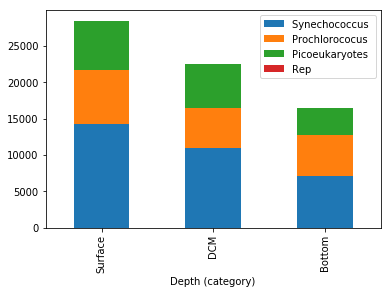

In [154]:
filtered_frame.plot(kind='bar', stacked=True)